# CS3300 Data Science
# Lab 02: Exploratory Data Analysis

## Learning Objectives
1. Understand the basic process of data science and exploratory data analysis including modes of
inquiry (hypothesis driven, data driven, and methods driven).
2. Identify, access, load, and prepare (clean) a data set for a given problem.
3. Select, apply, and interpret appropriate visual and statistical methods to analyze distributions
of individual variables and relationships between pairs of variables.
4. Communicate findings through generated data visualizations and reports.
5. Identify correlated and predictive variables.

## Overview
In the previous lab, you loaded and inspected a data set of real estate transactions. In this lab,
you are going to perform exploratory data analysis (EDA) to identify and explain the relationships
between dependent (output) and other independent variables. You should prepare your results
as a Jupyter notebook. In addition to code and plots, you should have text offering
interpretations and explanations. Your notebook should be organized into sections with
appropriate headers. The notebook and its code should be clean and polished. Use the Blood
Glucose Tutorial as a template and reference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part I: Loading the Data and Initial Assessment

In [2]:
data = pd.read_csv('Cleaned_Sacremento_Real_Estate_Date.csv')
data.head(5)

,street,sq__ft,sale_date,price,latitude,longitude,city,state,zip,beds,baths,type,Empty Lot,Street Types
0,3526 HIGH ST,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,CA,95838,2,1,Residential,False,ST
1,51 OMAHA CT,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,CA,95823,3,1,Residential,False,CT
2,2796 BRANCH ST,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,CA,95815,2,1,Residential,False,ST
3,2805 JANETTE WAY,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,CA,95815,2,1,Residential,False,WAY
4,6001 MCMAHON DR,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,CA,95824,2,1,Residential,False,DR


In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   street        985 non-null    object 
 1   sq__ft        985 non-null    int64  
 2   sale_date     985 non-null    object 
 3   price         985 non-null    int64  
 4   latitude      985 non-null    float64
 5   longitude     985 non-null    float64
 6   city          985 non-null    object 
 7   state         985 non-null    object 
 8   zip           985 non-null    int64  
 9   beds          985 non-null    int64  
 10  baths         985 non-null    int64  
 11  type          985 non-null    object 
 12  Empty Lot     985 non-null    bool   
 13  Street Types  985 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 101.1+ KB


In [4]:
data_mod = data.drop(columns=["city","state","zip","beds","baths","type"])
data_mod["city"] = data["city"].astype("category")
data_mod["state"] = data["state"].astype("category")
data_mod["zip"] = data["zip"].astype("category")
data_mod["beds"] = data["beds"].astype("category")
data_mod["baths"] = data["baths"].astype("category")
data_mod["type"] = data["type"].astype("category")
data_mod["Street Types"] = data["Street Types"].astype("category")

In [5]:
data_mod.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   street        985 non-null    object  
 1   sq__ft        985 non-null    int64   
 2   sale_date     985 non-null    object  
 3   price         985 non-null    int64   
 4   latitude      985 non-null    float64 
 5   longitude     985 non-null    float64 
 6   Empty Lot     985 non-null    bool    
 7   Street Types  985 non-null    category
 8   city          985 non-null    category
 9   state         985 non-null    category
 10  zip           985 non-null    category
 11  beds          985 non-null    category
 12  baths         985 non-null    category
 13  type          985 non-null    category
dtypes: bool(1), category(7), float64(2), int64(2), object(2)
memory usage: 60.2+ KB


## Part I: Regression on Price

Continous variables:
- square footage (sq__ft)
- price (price)
- logitude (longitude)
- latitude (latitude)
- beds (beds - data)
- baths (baths - data)

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

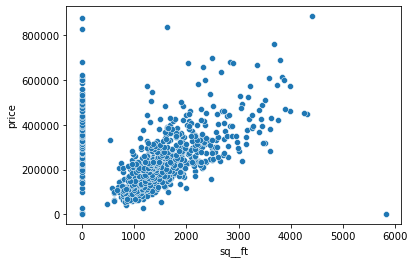

In [6]:
sns.scatterplot(x="sq__ft",y="price",data=data_mod)

<AxesSubplot:xlabel='price', ylabel='price'>

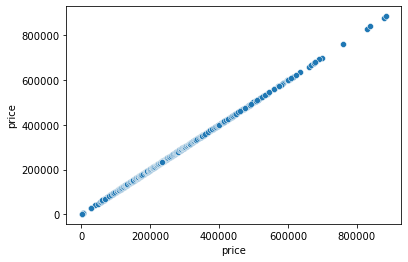

In [7]:
sns.scatterplot(x="price",y="price",data=data_mod)

<AxesSubplot:xlabel='longitude', ylabel='price'>

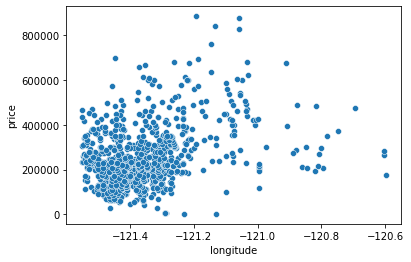

In [8]:
sns.scatterplot(x="longitude",y="price",data=data_mod)

<AxesSubplot:xlabel='latitude', ylabel='price'>

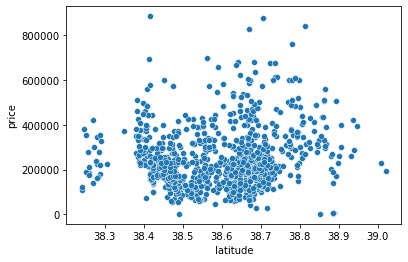

In [9]:
sns.scatterplot(x="latitude",y="price",data=data_mod)

<AxesSubplot:xlabel='beds', ylabel='price'>

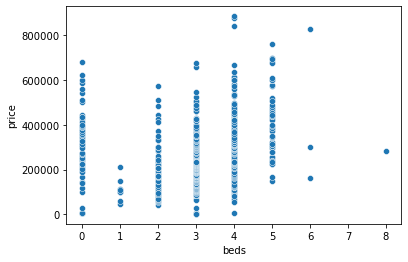

In [10]:
sns.scatterplot(x="beds",y="price",data=data)

<AxesSubplot:xlabel='baths', ylabel='price'>

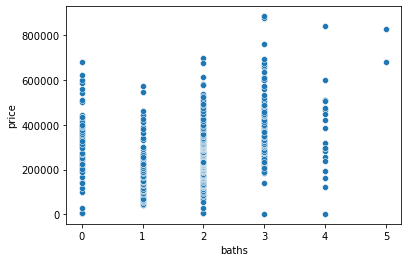

In [11]:
sns.scatterplot(x="baths",y="price",data=data)

| Variable | Predictive |
| --- | --- |
| square footage | ++ |
| price | +++ |
| longitude | + |
| latitude | - |
| beds | + |
| baths | + |

Categorical variables:
- city (city)
- state (state)
- zip (zip)
- beds (beds)
- baths (baths)
- type (type)
- Street Types (Street Types)

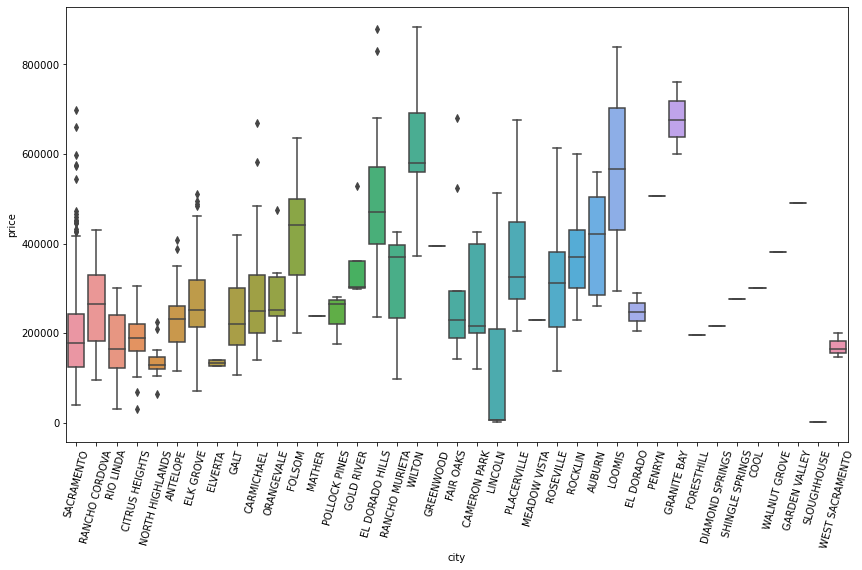

In [12]:
figure_dimensions = (14,8)
fig, ax = plt.subplots(figsize=figure_dimensions)
citycompare = sns.boxplot(x="city",y="price",data=data,ax=ax)
citycompare.set_xticklabels(citycompare.get_xticklabels(),rotation=75);

<AxesSubplot:xlabel='state', ylabel='price'>

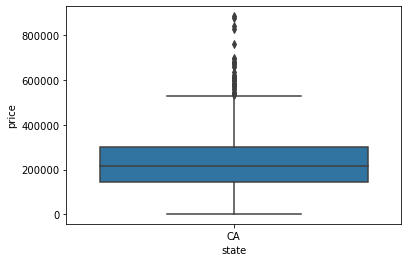

In [13]:
sns.boxplot(x="state",y="price",data=data)

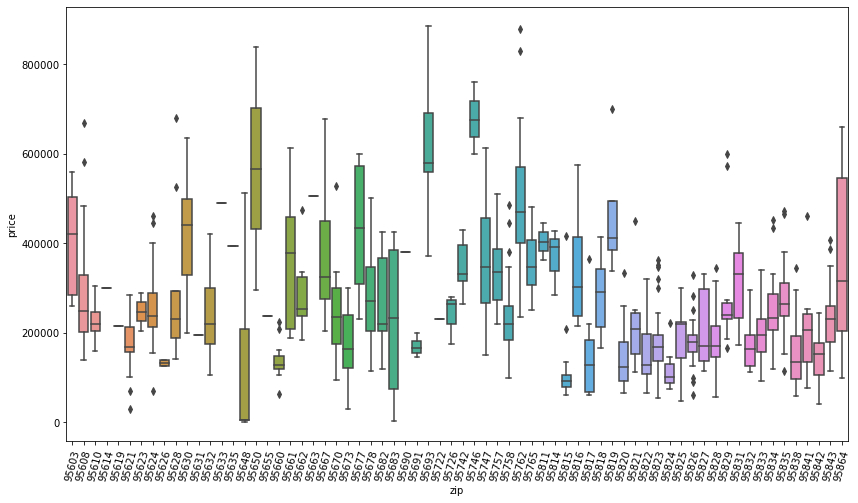

In [14]:
figure_dimensions = (14,8)
fig, ax = plt.subplots(figsize=figure_dimensions)
citycompare = sns.boxplot(x="zip",y="price",data=data,ax=ax)
citycompare.set_xticklabels(citycompare.get_xticklabels(),rotation=75);

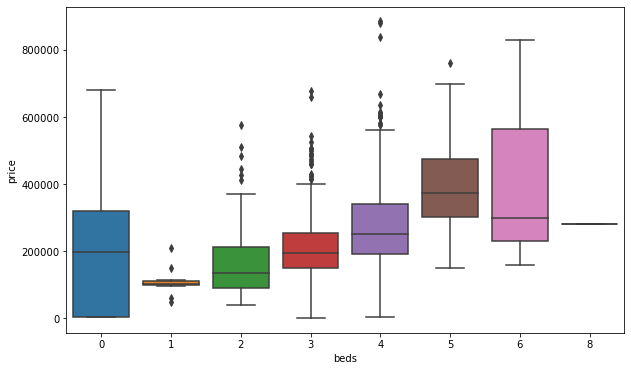

In [15]:
figure_dimensions = (10,6)
fig, ax = plt.subplots(figsize=figure_dimensions)
citycompare = sns.boxplot(x="beds",y="price",data=data_mod,ax=ax)

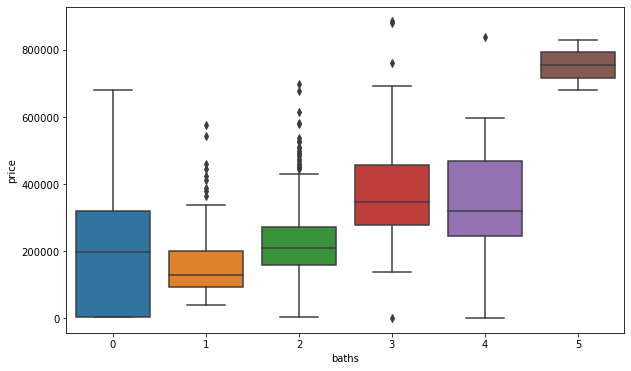

In [16]:
figure_dimensions = (10,6)
fig, ax = plt.subplots(figsize=figure_dimensions)
citycompare = sns.boxplot(x="baths",y="price",data=data_mod,ax=ax)

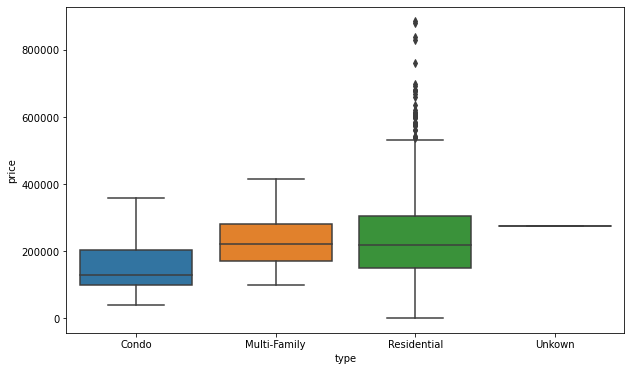

In [17]:
figure_dimensions = (10,6)
fig, ax = plt.subplots(figsize=figure_dimensions)
citycompare = sns.boxplot(x="type",y="price",data=data_mod,ax=ax)

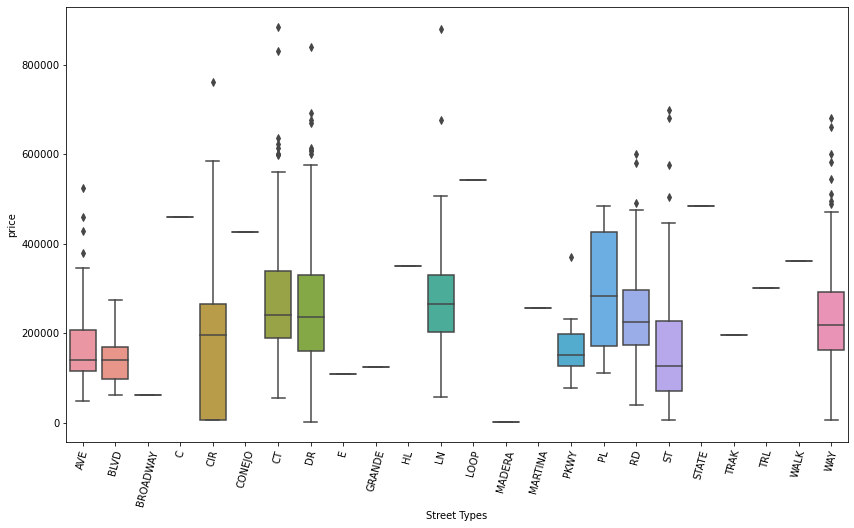

In [18]:
figure_dimensions = (14,8)
fig, ax = plt.subplots(figsize=figure_dimensions)
citycompare = sns.boxplot(x="Street Types",y="price",data=data_mod,ax=ax)
citycompare.set_xticklabels(citycompare.get_xticklabels(),rotation=75);

| Variable | Predictive |
| --- | --- |
| city | + |
| state | - |
| zip | ++ |
| beds | + |
| baths | + |
| type | +/- |
| Street Types | + |


## Part II: Classification on Property Type

<AxesSubplot:xlabel='type', ylabel='sq__ft'>

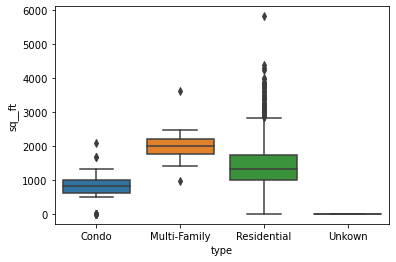

In [19]:
sns.boxplot(y="sq__ft",x="type",data=data_mod)

<AxesSubplot:xlabel='type', ylabel='price'>

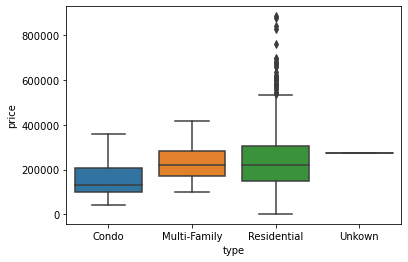

In [20]:
sns.boxplot(y="price",x="type",data=data_mod)

<AxesSubplot:xlabel='type', ylabel='longitude'>

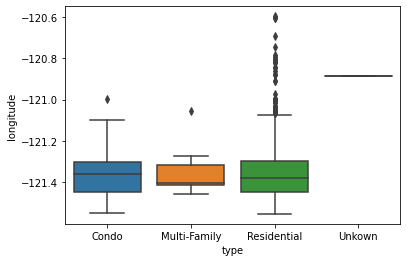

In [21]:
sns.boxplot(y="longitude",x="type",data=data_mod)

<AxesSubplot:xlabel='type', ylabel='latitude'>

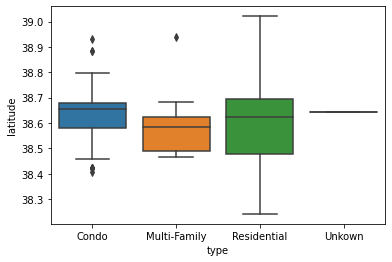

In [22]:
sns.boxplot(y="latitude",x="type",data=data_mod)

<AxesSubplot:xlabel='type', ylabel='beds'>

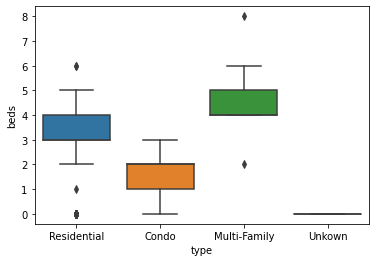

In [23]:
sns.boxplot(y="beds",x="type",data=data)

<AxesSubplot:xlabel='type', ylabel='baths'>

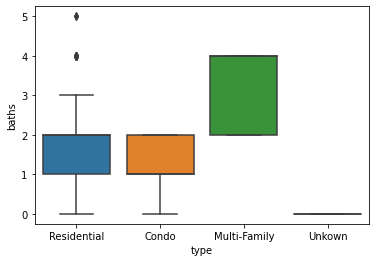

In [24]:
sns.boxplot(y="baths",x="type",data=data)

| Variable | Predictive |
| --- | --- |
| square footage | + |
| price | +/- |
| longitude | - |
| latitude | +/- |
| beds | ++ |
| baths | + |

Categorical variables:
- city (city)
- state (state)
- zip (zip)
- beds (beds)
- baths (baths)
- type (type)
- Street Types (Street Types)

In [25]:
data_mod["constant"] = 1.0
data_mod.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   street        985 non-null    object  
 1   sq__ft        985 non-null    int64   
 2   sale_date     985 non-null    object  
 3   price         985 non-null    int64   
 4   latitude      985 non-null    float64 
 5   longitude     985 non-null    float64 
 6   Empty Lot     985 non-null    bool    
 7   Street Types  985 non-null    category
 8   city          985 non-null    category
 9   state         985 non-null    category
 10  zip           985 non-null    category
 11  beds          985 non-null    category
 12  baths         985 non-null    category
 13  type          985 non-null    category
 14  constant      985 non-null    float64 
dtypes: bool(1), category(7), float64(3), int64(2), object(2)
memory usage: 67.9+ KB


In [26]:
data_mod.head(5)

,street,sq__ft,sale_date,price,latitude,longitude,Empty Lot,Street Types,city,state,zip,beds,baths,type,constant
0,3526 HIGH ST,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST,SACRAMENTO,CA,95838,2,1,Residential,1.0
1,51 OMAHA CT,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT,SACRAMENTO,CA,95823,3,1,Residential,1.0
2,2796 BRANCH ST,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST,SACRAMENTO,CA,95815,2,1,Residential,1.0
3,2805 JANETTE WAY,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY,SACRAMENTO,CA,95815,2,1,Residential,1.0
4,6001 MCMAHON DR,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR,SACRAMENTO,CA,95824,2,1,Residential,1.0


<AxesSubplot:xlabel='None-city', ylabel='zip'>

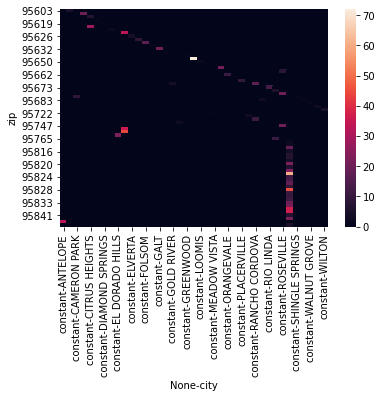

In [27]:
heatdat = data_mod[["city","zip","constant"]].groupby(by=["city","zip"]).count().unstack(level=0)
newheatdat = heatdat.fillna(value=0)
sns.heatmap(newheatdat)

In [28]:
def easyheat(df, feature1, feature2, feature3):
    #feature 1,2,3 should be category strings for the dataframe df
    # HELP!! https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
    heatdat = df[[feature1,feature2,feature3]].groupby([feature1,feature2]).count().unstack(level=0)
    newheatdat = heatdat.fillna(value=0)
    return newheatdat

<AxesSubplot:xlabel='None-city', ylabel='type'>

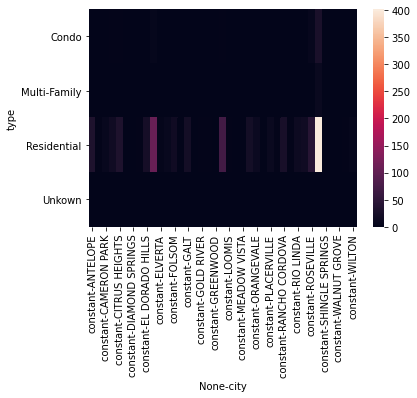

In [29]:
sns.heatmap(easyheat(data_mod, "city", "type", "constant"))

<AxesSubplot:xlabel='None-zip', ylabel='type'>

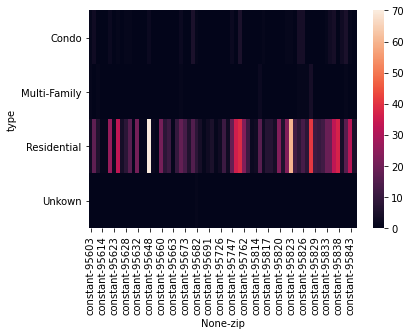

In [30]:
sns.heatmap(easyheat(data_mod, "zip", "type", "constant"))

<AxesSubplot:xlabel='None-beds', ylabel='type'>

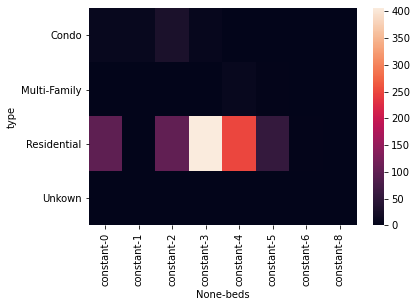

In [31]:
sns.heatmap(easyheat(data_mod, "beds", "type", "constant"))

<AxesSubplot:xlabel='None-baths', ylabel='type'>

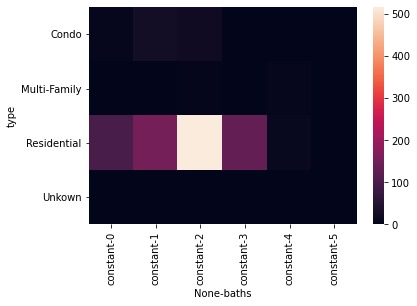

In [32]:
sns.heatmap(easyheat(data_mod, "baths", "type", "constant"))

<AxesSubplot:xlabel='None-Street Types', ylabel='type'>

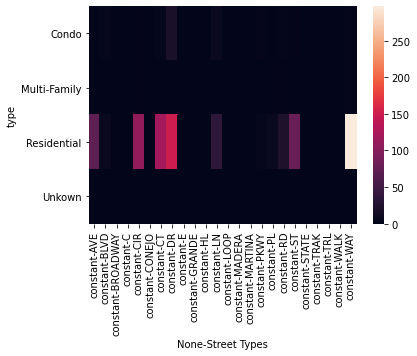

In [33]:
sns.heatmap(easyheat(data_mod, "Street Types", "type", "constant"))

This data set looks fairly heaviy weighted for observations of residential. It is hard to see trends in the categorical data for residential type.